In [118]:
import numpy as np
import pandas as pd
from scipy.stats import norm

In [119]:
from google.colab import drive
drive.mount('/gdrive')
import sys
sys.path.insert(0,'/gdrive/MyDrive/portfolio')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Calculation of Returns

In [120]:
"""
We cannot perform mathematical operations on list, so converted the list first into array.
prices_a = [8.70, 8.91, 8.71]
"""
prices_a = np.array([8.70, 8.91, 8.71])

# To calculate (8.91/8.700)-1 AND (8.71/8.91)-1
print("Returns: " + str(prices_a[1:]/prices_a[:-1] - 1))

#================= METHOD 2 using Pandas DataFrame

prices = pd.DataFrame(
                {"Stock A": [8.70, 8.91, 8.71, 8.43, 8.73],
                 "Stock B": [10.66, 11.00, 10.71, 11.59, 12.11]
                })
prices

"""
prices.iloc[1:]/prices.iloc[:-1] - 1
If we use above method, it would give bizarre results since it will automatically align 
the values from both lists using index
-------------
To perform positional divisions, we extract out the values in numpy as long as one of them do not have index, 
it won't have any index to align 

prices.iloc[1:].values returns values as array of lists
array([[ 8.91, 11.  ],
       [ 8.71, 10.71],
       [ 8.43, 11.59],
       [ 8.73, 12.11]])
       
and just iloc returns a dataframe with integer based indexing
Note that .iloc returns a Pandas Series when one row is selected,and a Pandas DataFrame when multiple rows are selected, 
or if any column in full is selected.
"""

prices.iloc[1:].values/prices.iloc[:-1] - 1
# OR
prices.iloc[1:]/prices.iloc[:-1].values - 1


#====================== METHOD 3 using shift function
prices/prices.shift(1) - 1

#====================== METHOD 4 using percentage change function
returns = prices.pct_change()
returns = returns.dropna()
returns

Returns: [ 0.02413793 -0.02244669]


,Stock A,Stock B
1,0.024138,0.031895
2,-0.022447,-0.026364
3,-0.032147,0.082166
4,0.035587,0.044866


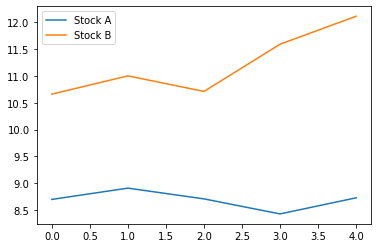

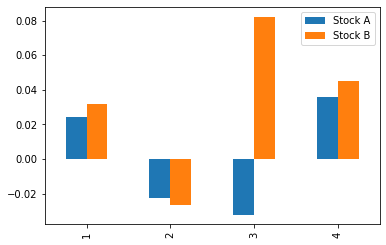

In [121]:
#Plot returns for Stock A and Stock B

prices.plot()
returns.plot.bar()

In [122]:
#Total Returns
"""
To calculate the total returns for each Stock, we need to multiply (1+R) for each year - 1
"""

total_return = np.prod(returns+1)-1

#============= METHOD 2

total_return = (((returns+1).prod()-1)*100).round(2)
total_return

Stock A     0.34
Stock B    13.60
dtype: float64

In [123]:
#Annualization
"""
Step 1: Annualized Returns = (1 + Return) ^ (1 / N) - 1 
                where, N = number of periods measured
                
Step 2: To annualize a number, multiply the shorter-term rate of return by the number of periods that make up one year. 
        One month's return would be multiplied by 12 months while one quarter's return by four quarters.
             
             => Annualized Returns = (1 + Return) ^ (12 / N) - 1 for 12 months
"""
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

## Risk Adjusted Returns : Sharpe Ratio
Sharpe Ratio = (Return on Portfolio - RFR)/(Standard Deviation of Portfolio's excess return)

In [124]:
#Formula to calculate Standard Deviation
returns.std()

#==== Method 2 to compute standard deviation i.e volatility

#Calculate Variance
deviations = returns - returns.mean()
squared_deviations = deviations**2

#SQRT(Standard_deviation**2) takes (n) while std() takes (n-1) since it considers it as sample and not population

#variance = squared_deviations.mean()
number_of_obs = returns.shape[0]  #Returns number of rows
variance = squared_deviations.sum()/(number_of_obs - 1)

#Standard Deviation: Following gives same result as returns.std()
volatility = np.sqrt(variance) 

#To convert monthly volatility to yearly volatility
volatility = volatility*np.sqrt(12)
volatility

Stock A    0.116272
Stock B    0.155991
dtype: float64

In [125]:
returns = pd.read_csv("/gdrive/MyDrive/portfolio/Portfolios_Formed_on_ME_monthly_EW.csv",
                header=0, index_col=0, parse_dates = True, na_values = 99.99)
returns

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,-99.99,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,-99.99,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,-99.99,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,-99.99,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,-99.99,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,-99.99,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,-99.99,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,-99.99,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,-99.99,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In [126]:
columns = ["Lo 10", "Hi 10"]

#Convert -1.45% to -0.0145 
returns = returns[columns]/100

#Rename Columns
returns.columns = ['SmallCap', 'LargeCap']

returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


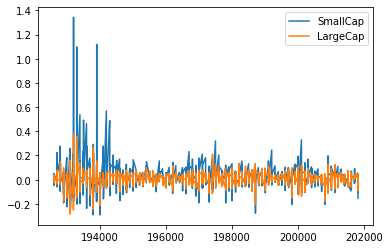

In [127]:
returns.plot.line()

In [128]:
#Monthly Volatility
returns.std()

#Annual Volatility
"""
To present this volatility in annualized terms, 
we simply need to multiply our daily standard deviation by the square root of frequency(periods). 
"""
annualized_vol = returns.std() * np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [129]:
#Total Return over all the months i.e 1110 months
return_per_month = (returns+1).prod()

# Return for one month = (Total Return over all the months i.e 1110 months / 1110) -1
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

#Return for 1 year = (1 + Return for one month)^12 - 1
annualized_return = (return_per_month+1)**12 - 1
annualized_return

#Method 2 to calculated annualized return
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [130]:
#Sharpe Ratio
riskfree_rate = 0.03
SharpeRatio = (annualized_return - riskfree_rate)/annualized_vol
SharpeRatio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

## Compute Drawdown: Buy at highest, Sell at lowest
A drawdown is a peak-to-trough decline during a specific period for an investment, trading account, or fund. A drawdown is usually quoted as the percentage between the peak and the subsequent trough. If a trading account has 10,000 in it, and the funds drop to $9,000 before moving back above 10,000, then the trading account witnessed a 10 percent drawdown.

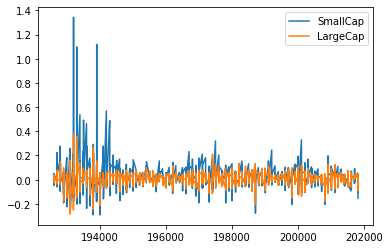

In [131]:
"""
If True and parse_dates is enabled, pandas will attempt to infer the format of the datetime strings in the columns, and if it can be inferred, 
switch to a faster method of parsing them.
"""

me_m = pd.read_csv("/gdrive/MyDrive/portfolio/Portfolios_Formed_on_ME_monthly_EW.csv",
                header=0, index_col=0, parse_dates = True, na_values = 99.99)

"""
columns = ['Lo 10', 'Hi 10']
rets = me_m[columns] 

===> THIS CAN BE WRITTEN AS BELOW
"""

rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [132]:
#To convert this into TimeSeries, we will change the format of X-Axis from integer to DateTime
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [133]:
#Function to cast the underlying data of the given series object to Index at target frequency

"""
To display records only for particular year, use rets[year]

Ex. rets["1975"]
"""

#Cast Index to monthly frequency
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


### Compute Drawdowns

1. Compute a wealth index
    => The wealth index is basically the cumulative product of the all monthly returns in defined period
2. Compute previous peaks
3. Compute Drawdown - which is wealth value as a percentage of previous peak

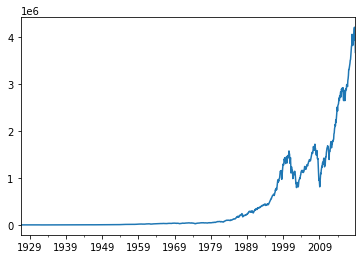

In [134]:
#Calculate cumulative returns
wealth_index = 1000*(1+rets['LargeCap']).cumprod()
wealth_index.head()
wealth_index.plot.line()

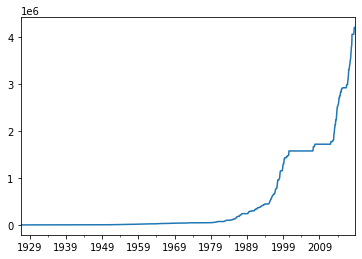

In [135]:
#Calculate previous maximum value
previous_peaks = wealth_index.cummax()
previous_peaks.head()
previous_peaks.plot()

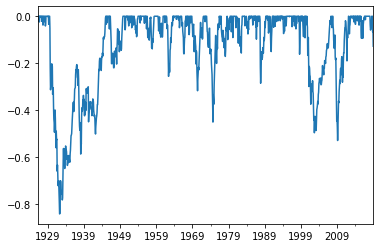

In [136]:
#Drawdown
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [137]:
#Maximum drawdown since 1975
drawdown["1975":].min()

#To calculate corresponding index of maximum drawdown
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [138]:
def drawdown(return_series: pd.Series):
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    1) The Wealth Index
    2) Previous Peaks
    3) Percent drawdowns
    """
    
    wealth_index = 1000 * (1+return_series).cumprod()
    previous_peak = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peak)/previous_peak
    
    return pd.DataFrame({
        "Wealth" : wealth_index,
        "Peaks" : previous_peak,
        "Drawdown" : drawdowns
    })

In [139]:
drawdown(rets['LargeCap']).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


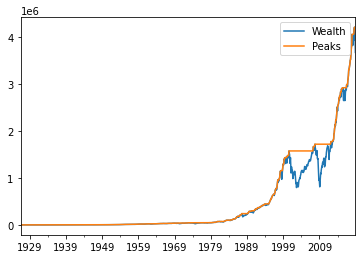

In [140]:
drawdown(rets['LargeCap'])[['Wealth', 'Peaks']].plot()

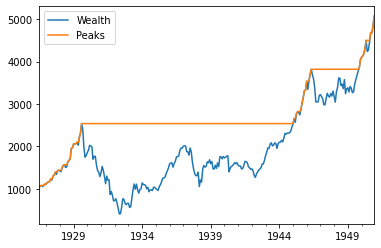

In [141]:
#To plot wealth and index of LargeCap upto 1950
drawdown(rets[:"1950"]['LargeCap'])[['Wealth', 'Peaks']].plot()

In [142]:
drawdown(rets['LargeCap'])[['Drawdown']].min()

Drawdown   -0.840038
dtype: float64

In [143]:
drawdown(rets['LargeCap'])[['Drawdown']].idxmin()

Drawdown    1932-05
dtype: period[M]

In [144]:
drawdown(rets['SmallCap'])[['Drawdown']].min()

Drawdown   -0.833001
dtype: float64

In [145]:
drawdown(rets['SmallCap'])[['Drawdown']].idxmin()

Drawdown    1932-05
dtype: period[M]

# Building Modules

In [146]:
import sys
sys.path.insert(0,'/gdrive/MyDrive/portfolio')

In [147]:
#Mode2 is auto reload everything, anytime any file that you imported changes

%load_ext autoreload 
%autoreload 2
%reload_ext autoreload

import edhec_risk_kits as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
returns = erk.get_ffme_returns()
returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [149]:
#To compute maximum drawdown for SmallCap funds
erk.drawdown(returns["SmallCap"])["Drawdown"].min()

-0.8330007793945303

# Deviations from Normality

In [151]:
import edhec_risk_kits as erk

hfi = erk.get_hfi_returns()

hfi = pd.read_csv("/gdrive/MyDrive/portfolio/edhec-hedgefundindices.csv",
                header=0, index_col=0, parse_dates = True)
hfi = hfi/100
hfi.index = hfi.index.to_period('M')

In [152]:
"""
To compute mean, median and check is mean is greater than median for skewness
    If Mean>Median => Right/Positively Skewed
    If Mean<Median => Left/Negatively Skewed
"""
graph = pd.concat([hfi.mean(), hfi.median(), hfi.mean()>hfi.median()], axis="columns")
graph.columns = ['Mean', 'Median', 'Mean>Median -> Left Skewed?']
graph

,Mean,Median,Mean>Median -> Left Skewed?
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


### Skewness

In [153]:
r = erk.get_hfi_returns()

demeaned_r = r - r.mean()
# Use the population standard deviation, so set dof=0
sigma_r = r.std(ddof=0)
exp = (demeaned_r**3).mean()
skewness = exp/sigma_r**3
skewness.sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [154]:
#Using scipy.stats
import scipy.stats
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

### Kurtosis

In [155]:
r = hfi
demeaned_r = r - r.mean()
# Use the population standard deviation, so set dof=0
sigma_r = r.std(ddof=0)
exp = (demeaned_r**4).mean()
kurtosis = exp/sigma_r**4
kurtosis.sort_values()

CTA Global                 2.952960
Long/Short Equity          4.523893
Global Macro               5.741679
Short Selling              6.117772
Funds Of Funds             7.070153
Distressed Securities      7.889983
Event Driven               8.035828
Merger Arbitrage           8.738950
Emerging Markets           9.250788
Relative Value            12.121208
Equity Market Neutral     17.218555
Convertible Arbitrage     23.280834
Fixed Income Arbitrage    29.842199
dtype: float64

In [156]:
scipy.stats.kurtosis(hfi)

array([20.28083446, -0.04703963,  4.88998336,  6.25078841, 14.21855526,
        5.03582817, 26.84219928,  2.74167945,  1.52389258,  5.73894979,
        9.12120787,  3.11777175,  4.07015278])

### Jarque Bera test: Test for Normality based on Sample Skewness and Kurtosis

If p_value > significanse level: Normal Distribution

In [157]:
level = 0.01

statictics, p_value = scipy.stats.jarque_bera(hfi)
p_value>level

#True if Normal, else False
hfi.aggregate(erk.is_normal)  #-> Apply is_normal function on each column of hfi

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [158]:
ffme = erk.get_ffme_returns()
erk.skewness(ffme)
erk.kurtosis(ffme)
erk.is_normal(ffme)

#Check if Small Cap and Large Cap Funds follow Normal Distribution
ffme.aggregate(erk.is_normal)

SmallCap    False
LargeCap    False
dtype: bool

### Semi Deviation
Semi-deviation is a method of measuring the below-mean fluctuations in the returns on investment. Semi-deviation will reveal the worst-case performance to be expected from a risky investment.

In [159]:
#Filter those returns that are less than 0 and compute standard deviations

hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

### VaR and CVaR
Value at Risk: A statistic that quantifies the extent of possible financial losses within a firm, portfolio, or position over a specific time frame. 
For Example: An asset has a 3% one-month VaR of 2%, representing a 3% chance of the asset declining in value by 2% during the one-month time frame.

Methods:
- Historic VaR => Historical value at risk (VaR), also known as historical simulation or the historical method, refers to a particular way of calculating VaR. In this approach we calculate VaR directly from past returns. For example, suppose we want to calculate the 1-day 95% VaR for an equity using 100 days of data. The 95th percentile corresponds to the least worst of the worst 5% of returns. In this case, because we are using 100 days of data, the VaR simply corresponds to the 5th worst day

- Parametric VaR - Gaussian
    => The parametric method, also known as the variance-covariance method, is a risk management technique for calculating the VaR of a portfolio of assets that first identifies the mean, or expected value, and standard deviation of an investment portfolio. The parametric method looks at the price movements of investments over a look-back period and uses probability theory to compute a portfolio's maximum loss. 
- Modified Cornish-Fisher VaR

In [160]:
#Historic Var

np.percentile(hfi, 5, axis=0)

#Interpretation for 1st entry: Convertible Arbitrage has 5% chance that in any given month, 
#you are going to lose about 1.576% or worse 

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [161]:
#Compute Historic VaR for each column in dataset, default level 5%

#For 10% Significanse Level
erk.var_historic(hfi, 10)

Convertible Arbitrage     0.00902
CTA Global                0.02406
Distressed Securities     0.01284
Emerging Markets          0.03198
Equity Market Neutral     0.00364
Event Driven              0.01218
Fixed Income Arbitrage    0.00338
Global Macro              0.01024
Long/Short Equity         0.01634
Merger Arbitrage          0.00548
Relative Value            0.00662
Short Selling             0.05214
Funds Of Funds            0.01318
dtype: float64

In [162]:
#Returns Z-Score for corresponding Significanse level

z_score = norm.ppf(0.05)

In [163]:
#Parametric VaR

VaR = -(hfi.mean() + (z_score * hfi.std(ddof=0)))
VaR

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [164]:
#Cornish Fisher VaR

"""
Earlier, we calculated Z-Score assuming it's a normal distribution. But now we need to take
Skewness and Kurtosis into account
"""
erk.var_gaussian(hfi, modified=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

In [165]:
#Comparison between all three methods
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified=True), erk.var_historic(hfi)]
comparison = pd.concat(var_list, axis=1)
comparison.columns = ['Gaussian', 'Cornish-Fisher', 'Historic']
comparison

,Gaussian,Cornish-Fisher,Historic
Convertible Arbitrage,0.021691,0.025166,0.01576
CTA Global,0.034235,0.033094,0.03169
Distressed Securities,0.021032,0.025102,0.01966
Emerging Markets,0.047164,0.053011,0.04247
Equity Market Neutral,0.008850,0.010734,0.00814
Event Driven,0.021144,0.025516,0.02535
Fixed Income Arbitrage,0.014579,0.017881,0.00787
Global Macro,0.018766,0.013581,0.01499
Long/Short Equity,0.026397,0.027935,0.02598
Merger Arbitrage,0.010435,0.012612,0.01047


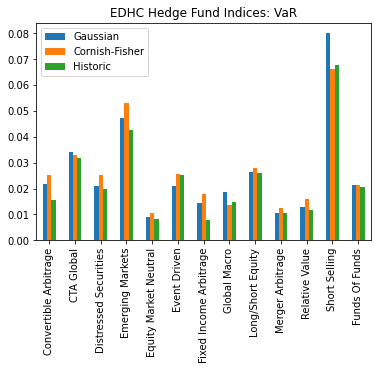

In [166]:
comparison.plot.bar(title="EDHC Hedge Fund Indices: VaR")

### Beyond Var: CVaR
Generally speaking, if an investment has shown stability over time, then the value at risk may be sufficient for risk management in a portfolio containing that investment. However, the less stable the investment, the greater the chance that VaR will not give a full picture of the risks, as it is indifferent to anything beyond its own threshold.

Conditional Value at Risk (CVaR) attempts to address the shortcomings of the VaR model, which is a statistical technique used to measure the level of financial risk within a firm or an investment portfolio over a specific time frame. While VaR represents a worst-case loss associated with a probability and a time horizon, CVaR is the expected loss if that worst-case threshold is ever crossed. CVaR, in other words, quantifies the expected losses that occur beyond the VaR breakpoint.

In [167]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

## Efficient Frontier
The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are sub-optimal because they have a higher level of risk for the defined rate of return.

In [170]:
ind = pd.read_csv("/gdrive/MyDrive/portfolio/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100
ind

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,0.0207,0.0407,0.0543,0.0318,0.1639,0.0102,0.0564,0.0154,-0.0140,0.0704,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,0.0472,0.0217,0.0206,0.0210,0.0423,0.0166,0.0055,0.0085,0.0369,-0.0169,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,-0.0050,0.0015,0.0036,-0.0056,0.0483,0.0273,0.0174,0.0030,-0.0369,0.0204,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,-0.0455,-0.0385,0.0111,-0.0573,-0.0793,-0.0556,-0.0320,0.0223,-0.0104,-0.0263,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,0.0220,0.0386,0.0318,0.0508,-0.0066,0.0787,0.0846,-0.0048,0.0006,0.0371,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,0.0049,-0.0323,-0.0194,0.0054,-0.0174,-0.0217,-0.1075,-0.0051,-0.0295,0.0091,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
201809,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,-0.0296,-0.0067,0.0088,0.0094,-0.0502,0.0645,-0.0173,-0.0538,0.0356,-0.0055,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
201810,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,-0.1316,-0.1161,-0.1379,-0.1364,0.0087,-0.0936,-0.1032,0.0147,-0.1206,-0.0006,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
201811,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,0.0364,-0.0300,0.0706,0.0512,0.0376,0.0077,-0.0095,-0.1414,-0.0233,0.0327,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


In [171]:
#Above the dates are treated as integers, hence we need to convert them into datetime format
# and then convert them into monthly periods

ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,0.0207,0.0407,0.0543,0.0318,0.1639,0.0102,0.0564,0.0154,-0.0140,0.0704,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,0.0472,0.0217,0.0206,0.0210,0.0423,0.0166,0.0055,0.0085,0.0369,-0.0169,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,-0.0050,0.0015,0.0036,-0.0056,0.0483,0.0273,0.0174,0.0030,-0.0369,0.0204,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,-0.0455,-0.0385,0.0111,-0.0573,-0.0793,-0.0556,-0.0320,0.0223,-0.0104,-0.0263,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,0.0220,0.0386,0.0318,0.0508,-0.0066,0.0787,0.0846,-0.0048,0.0006,0.0371,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [172]:
#The columns in initial dataset has embedded space like 'Food  ', so we need to remove them
ind.columns = ind.columns.str.strip()
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

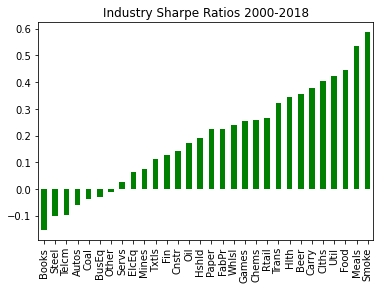

In [173]:
erk.sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 2000-2018", color="green")

In [174]:
#Generate Efficient Frontier

#Step 1: Annualized returns
er = erk.annualize_rets(ind["1996":"2000"], 12)

#Step 2: Covariance matrix
cov = ind["1996":"2000"].cov()

## Efficient Frontier

In [175]:
assets = ['Food', 'Beer', 'Smoke','Coal']

#Annualized returns for above assets
er[assets] 

#Corresponding Covariance Matrix
cov.loc[assets, assets]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [176]:
#Assign 0.25 initial weight to each asset

weights = np.repeat(1/4, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [177]:
#Returns Portfolio returns using the weighted average
erk.portfolio_return(weights, er[assets])

0.19511097196038385

In [178]:
#Returns Portfolio Volatility
erk.portfolio_vol(weights, cov.loc[assets, assets])

0.055059195776437045

### 2 Asset Frontier

In [179]:
assets = ['Games', 'Fin']

In [180]:
"""
1) Generate vector of weights: one will be 100% in Games and other will be 100% in Fin and others will be in between.

2) List Comprehension: Each element will look like: np.array([w, 1-w])

The numpy.linspace() function returns number spaces evenly w.r.t interval. 
Similar to numpy.arrange() function but instead of step it uses sample number. 
"""

n_points = 20

weights = [np.array([w, 1-w]) for w in np.linspace(0,1, n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [181]:
#Compute Returns and Volatility w.r.t weights generated
"""
PORTFOLIO RETURN = Weight_Transpose @ Returns

(The symbol @ in Python is used for decorators and matrix multiplication 
and .T is used for Transpose)

Weight is k x 1 vector of weights
Returns is k x 1 vector of asset returns


PORTFOLIO VOLATILITY = (weights.T @ covariance_matrix @ weights)**0.5

"""

rets = [erk.portfolio_return(w, er[assets]) for w in weights]
vol = [erk.portfolio_vol(w, cov.loc[assets, assets]) for w in weights]

ef = pd.DataFrame({
    "Returns": rets,
    "Volatility": vol
})

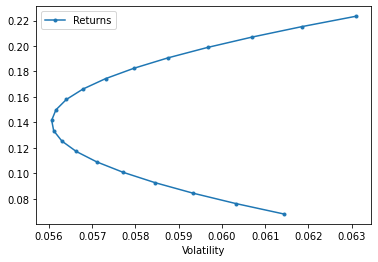

In [182]:
ef.plot.line(x="Volatility", y="Returns", style=".-")

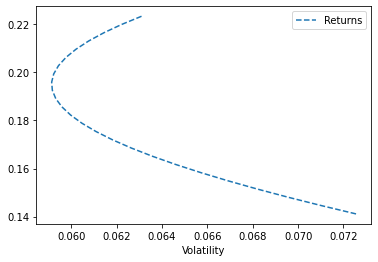

In [183]:
#Using Module
assets = ['Fin', 'Beer']
erk.plot_ef2(25, er[assets], cov.loc[assets, assets], style="--")

### N-Asset Efficient Frontier

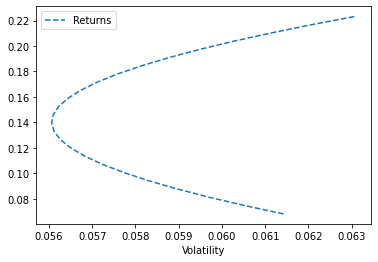

In [184]:
#Calculation of Weights
# Step 1: Find the weights of a portfolio having minimum volatility for given target return

assets = ['Fin', 'Games']
erk.plot_ef2(25, er[assets], cov.loc[assets, assets], style="--")

In [185]:
#Generate weights for portfolio having minimum volatility for return of 15%

weight_15 = erk.minimize_vol(0.15, er[assets], cov.loc[assets,assets])
weight_15

array([0.52712369, 0.47287631])

In [186]:
#Corresponding Volatility

volatility_15 = erk.portfolio_vol(weight_15, cov.loc[assets,assets])
volatility_15

0.056163669406706564

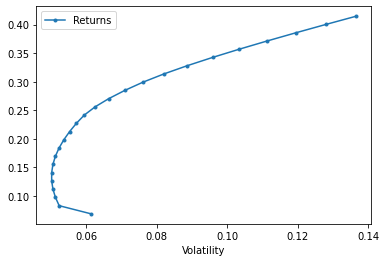

In [187]:
# 4 Asset Portfolio
assets = ['Smoke', 'Fin', 'Games', 'Coal']

erk.plot_ef(25, er[assets], cov.loc[assets, assets])

## Capital Market Line

Shows the change in shape of efficient frontier when risk-free assets is introduced. When we only have risky assets, we get the upper side of efficient frontier which gives highest possible return for a given level of volatility. All investors should hold a combination of the risk-free asset and the portfolio that maximizes the Reward-per-Risk ratio. So the capital market line has the highest slope on efficient frontier and has Maximum Sharpe Ratio(MSR).

Slope of Capital Market Line = Maximum Sharpe Ratio

Maximum Sharpe Ratio only has systematic risk i.e. the risk that cannot be diversified. It doesn't have any specific risk(Risk that can be diversified away).

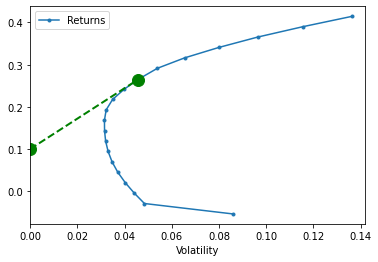

In [188]:
erk.plot_ef(20,er, cov, show_cml=True, riskfree_rate = 0.1)